

# Analyzing the TMDb-movies dataset!

## Table of Contents
<ul><li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li></ul>

<a id='intro'></a>
## Introduction

For this project, I have selected the tmdb-movies dataset to investigate. This dataset houses information on over 10,000 movies and was collected by TMDb (The Movie Database). It includes users ratings, budgets, revenues, and other data about the movie.

TMDb - https://www.themoviedb.org/

With this dataset, I will be analyzing the following:
        <ul>
        <li>Top 50 movies with the highest revenue?</li>
        <li>Top 50 movies with the lowest revenue?</li>
        <li>Which years had the highest total overall revenue? </li>
        <li>Which years had the lowest total overall revenue? </li>
        <li>Movies with a revenue of 500 million or greater and how many by year </li>
        <li>Movies with a revenue of 1 billion or greater and how many by year </li>
        </ul>
        
## Let's Get Started!

First, we will start below by importing the packages we will be using for this project:  
<ul>
    <li>pandas - used for data manipulation and analysis</li> 
    <li>numpy - used for arrays, math functions, etc.</li>   
    <li>matplotlib - used to create visualizations</li></ul>

I will also use a magic command to render the figures in the current Jupyter notebook:
<ul>
    <li>%matplotlib inline</li></ul>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

We have imported our python packages, assigned them proper aliases, and included our magic command. 

Now, let's move on to the data wrangling step in analyzing our dataset.

<a id='wrangling'></a>
## Data Wrangling

Here, we will begin the data wrangling process by first loading the data into a Pandas dataframe and begin our observations.

### Initial Analysis & Overview of the tmdb-movies dataset

Below, we give our pandas dataframe a name of 'movies', and we use the pandas function 'read_csv' to import our csv file into our pandas dataframe. 

We then use the pandas function head() on our 'movies' dataframe to display the first few rows to begin our analysis.

In [74]:
movies = pd.read_csv('tmdb-movies.csv') #using read_csv to load our data into a Pandas dataframe
movies.head() #using the head() function to display the first few rows of the dataframe

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


We see above that the head() function shows us the first 5 rows and the total amount of columns, which is 21.

Next, we will use .shape to return a tuple of the dimensions of the dataframe. This will gives us the total number of rows and colums in the dataframe. 

In [75]:
movies.shape #returns a tuple of the dataframe - number of entries and number of columns in data

(10866, 21)

We can confirm we have 21 columns and 10866 rows in our dataframe. 

We can also check the data types of our columns with using .dtypes on our movies dataframe.

In [76]:
movies.dtypes #checking the data types of the columns

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

One thing to note is the revenue column is already set to the int data type, so we will not have to make any data type conversions there.

Next, we will use .info() to explore the columns a little further. We can see again the data types used, column names, and if null values are present.

In [77]:
movies.info() #using the info method for an overview summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Looking above, we can confirm that we do have NULL values present in quite a few columns(imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies). We will address the NULL values in the cleaning stages.

Next, let's look at how many unique values are present in each column by using .nunique() on our dataframe.

In [78]:
movies.nunique() #number of unique values in each column

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

As the number of unique values in each column are shown above, we can see that there are possible duplicate rows by looking at the number of unique values in the original_title column. We will address the duplicate rows also in the cleaning stages.

Now, let's use .describe() to get some general statistics on our dataset which can be useful.

In [79]:
movies.describe() #using .describe() for some stats

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Now that we have taken our initial look at our dataset, let's move on to the cleaning process!

## Cleaning the data in the tmdb-movies dataset

Next, we will begin cleaning our data before moving on in the analytical process.

First, we will look at dropping columns that are not needed for our analysis. Our analysis' main focus is on revenue information of the movie titles and thus we will be dropping the following columns:
<ul>
    <li>id</li>
    <li>imdb_id</li>
    <li>popularity</li>
    <li>homepage</li>
    <li>tagline</li>
    <li>keywords</li>
    <li>overview</li>
    <li>vote_count</li>
    <li>vote_average</li>
    <li>cast</li>
    <li>production_companies</li>
    <li>budget_adj</li>
    <li>revenue_adj</li>
    <li>genres</li>
    <li>runtime</li>
    <li>budget</li></ul>

We are removing the budget and revenue adjustment columns as these columns are estimates of 2010 revenue based on inflation over time and we are more concerned with the <u>actual revenue</u> the movie title made.

We will use .drop() to remove the columns.

In [80]:
movies.drop(['id','imdb_id','popularity','runtime','homepage','production_companies', 
                'keywords', 'tagline', 'cast', 'overview', 'vote_count','vote_average',
                 'budget_adj', 'revenue_adj', 'genres', 'budget'], axis=1, inplace=True) #dropping columns we don't need

We will now confirm the columns were dropped successfully by running .info() again. 

In [81]:
movies.info() #confirming the drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   revenue         10866 non-null  int64 
 1   original_title  10866 non-null  object
 2   director        10822 non-null  object
 3   release_date    10866 non-null  object
 4   release_year    10866 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 424.6+ KB


As we see above, the columns were dropped successfully. 

We can now work on filling the NULL values in the remaining columns. We have NULL values in the director column.

We can verify this by using .isnull() and running a sum on the columns.

In [82]:
movies.isnull().sum()

revenue            0
original_title     0
director          44
release_date       0
release_year       0
dtype: int64

As you can see, the director column has 44 NULL values.

We will use .fillna() to fill in the NULL values in that column. The NULL values will be replaced with the string 'Unknown'.

In [83]:
movies['director'] = movies['director'].fillna('Unknown') #filling null values
## movies['director'].fillna('Unknown', inplace=True) ## another way to do it

We have replaced the NULL values. Now, we will verify by using .info() again.

In [84]:
movies.info() #confirming null values filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   revenue         10866 non-null  int64 
 1   original_title  10866 non-null  object
 2   director        10866 non-null  object
 3   release_date    10866 non-null  object
 4   release_year    10866 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 424.6+ KB


All columns now contain 10866 values. Now let's check for duplicate movie titles and remove those.

Here, we will use .duplicated() on the 'original_title' column and get a total count of duplicates by using sum.

In [85]:
sum(movies.duplicated('original_title')) #count duplicate entries

295

Our results returned 295 duplicate entries. We will now remove those duplicates with .drop_duplicates() on the 'original_title' column. We will then use .info() again to verify our drops. 

In [86]:
movies.drop_duplicates('original_title', inplace=True) #to drop duplicates
movies.info() #to verify drop of duplicates

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 10865
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   revenue         10571 non-null  int64 
 1   original_title  10571 non-null  object
 2   director        10571 non-null  object
 3   release_date    10571 non-null  object
 4   release_year    10571 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 495.5+ KB


One last thing we need to clean is removing the entries where the revenue is equal to 0. We have entries where the movie's revenue is set to 0 because it was not recorded or missing. We also have some movies with very low values that don't seem correct. We will want to exclude these values as well for this analysis.

We will modify our 'movies' dataframe to only include the entries where the revenue column is greater than or equal to 1000.

In [87]:
movies = movies[movies.revenue >= 1000]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 0 to 10848
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   revenue         4677 non-null   int64 
 1   original_title  4677 non-null   object
 2   director        4677 non-null   object
 3   release_date    4677 non-null   object
 4   release_year    4677 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 219.2+ KB


We have ended up with a total of 4677 rows and 5 columns.

Now that our data has been cleaned of duplicates, NULL values, missing values, and unneccessary columns, we can begin to query our data and acquire the information we are looking for from the questions above. 

<a id='eda'></a>
## Exploratory Data Analysis
        

##### 1)Top 50 movies with highest revenue

First, we will set the index of the 'movies' dataframe to the original_title column. This will index our dataframe by movie title rather than an index number and help to visualize the reports better.

In [88]:
movies = movies.set_index('original_title') #setting index to original title so we can order by the movie title
movies.head(10) #showing first 10 rows

,revenue,director,release_date,release_year
original_title,,,,
Jurassic World,1513528810,Colin Trevorrow,6/9/15,2015
Mad Max: Fury Road,378436354,George Miller,5/13/15,2015
Insurgent,295238201,Robert Schwentke,3/18/15,2015
Star Wars: The Force Awakens,2068178225,J.J. Abrams,12/15/15,2015
Furious 7,1506249360,James Wan,4/1/15,2015
The Revenant,532950503,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,12/25/15,2015
Terminator Genisys,440603537,Alan Taylor,6/23/15,2015
The Martian,595380321,Ridley Scott,9/30/15,2015
Minions,1156730962,Kyle Balda|Pierre Coffin,6/17/15,2015


Great, now we have our movie title as the index column.

For our first question, we wanted to know the top 50 movies with the highest revenue. 

Here, we will utilize pandas' .nlargest() function to select the top 50 movies based on the revenue column. We will also store this data into a new dataframe called 'top' which we will be using shortly. 

In [89]:
top = movies.nlargest(50, 'revenue') #using nlargest on the revenue column to gather the top 50 and store into 'top'
top.head(10) #showing first 10 rows

,revenue,director,release_date,release_year
original_title,,,,
Avatar,2781505847,James Cameron,12/10/09,2009
Star Wars: The Force Awakens,2068178225,J.J. Abrams,12/15/15,2015
Titanic,1845034188,James Cameron,11/18/97,1997
The Avengers,1519557910,Joss Whedon,4/25/12,2012
Jurassic World,1513528810,Colin Trevorrow,6/9/15,2015
Furious 7,1506249360,James Wan,4/1/15,2015
Avengers: Age of Ultron,1405035767,Joss Whedon,4/22/15,2015
Harry Potter and the Deathly Hallows: Part 2,1327817822,David Yates,7/7/11,2011
Iron Man 3,1215439994,Shane Black,4/18/13,2013


Now, let's take a look at which years our movies in the top 50 occurred. 

In [90]:
top['release_year'].value_counts() #showing a count of movie titles by release year

2015    7
2012    6
2009    4
2013    4
2010    4
2007    4
2002    3
2011    3
2001    2
2003    2
2005    2
2014    1
1993    1
2008    1
1995    1
2004    1
1999    1
1997    1
1996    1
2006    1
Name: release_year, dtype: int64

As we can see, 2015 has the most movie titles in our top 50 with a total of 7.

Now, we can create some visuals with our top 50 data. To help us save some time with plotting, we are going to create some functions for our visuals. We will define the functions below and call on them later in our analysis.

In [91]:
#Creating a function for plotting a bar graph with a dataframe and column input
def show_bar(df, column):
    df[column].value_counts().plot(kind='bar', figsize=(10,7));
    plt.xlabel(column);

#Creating a function for plotting a pie chart with a dataframe and column input
def show_pie(df, column):
    df[column].value_counts().plot(kind='pie', figsize=(7,7));
    plt.xlabel(column);

#Creating a function for plotting a scatter plot with a dataframe and x and y inputs
def show_scatter(df, x, y):
    df.plot(kind='scatter', x=x, y=y, figsize=(10, 7));
    plt.xlabel(x); #using matplotlib to assign a x label
    plt.ylabel(y); #using matplotlib to assign a y label

#Creating a function for plotting a histogram with a dataframe and column input
def show_hist(df, column):
    df.hist(column, figsize=(7,7)) #using .hist() on the release_year column in the top dataframe
    plt.xlabel(column) #assigning a x label to plot
    plt.show() #using .show() to show visual using matplotlib

Now, we can go ahead and start putting our functions to use and plot some visuals! 

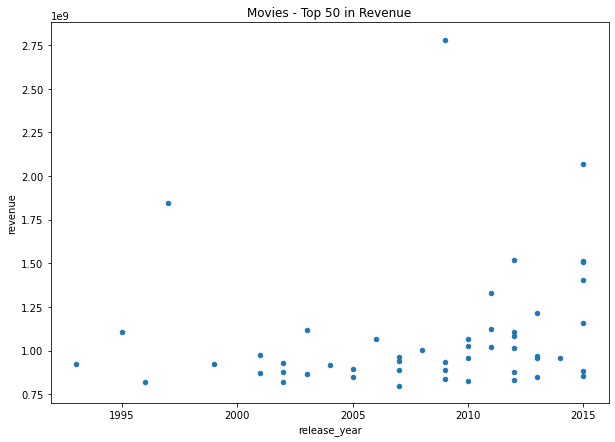

In [92]:
show_scatter(top, 'release_year', 'revenue') #calling the show_scatter function we created
plt.title('Movies - Top 50 in Revenue'); #using matplotlib to assign a title

Now, we will use the matplotlib package to create a histogram.

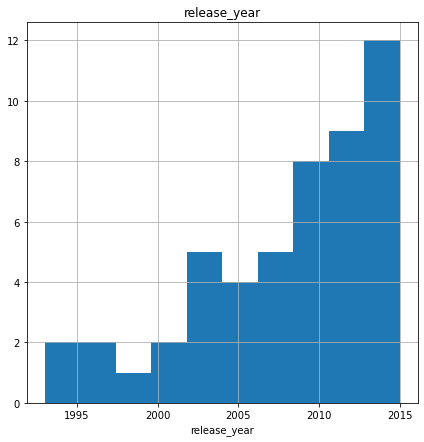

In [93]:
show_hist(top,'release_year') #calling the show_hist function we created

We will now provide a bar graph visual using .plot() again on the .value_counts() to show the number of titles per year in the top 50.

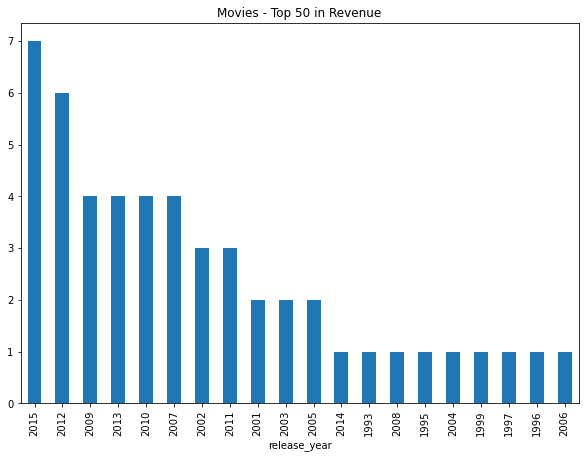

In [94]:
show_bar(top, 'release_year')
plt.title('Movies - Top 50 in Revenue'); #using matplotlib to assign a title

Here is the same data from the above bar graph set in a pie chart using .plot() again on the .value_counts().

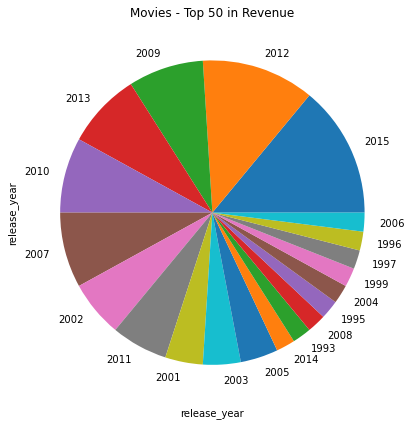

In [95]:
show_pie(top, 'release_year')
plt.title('Movies - Top 50 in Revenue'); #using matplotlib to assign a title

The output provides us a report of the top 50 movies by highest revenue. 

Now, let's take a look at the 50 movies with the worst revenue in our dataset. 

##### 2)Top 50 movies with lowest revenue
We can achieve this one by utilizing another function from the pandas package. This time we will be using .nsmallest() on the revenue column for the 50 worst movies. We will store this data into a new dataframe called 'low'.

In [96]:
low = movies.nsmallest(50, 'revenue') #using nsmallest on the revenue column to gather worst 50 and storing into 'low'
low.head(10) #showing first 10 rows

,revenue,director,release_date,release_year
original_title,,,,
The Butterfly Room,1081,Jonathan Zarantonello,8/4/12,2012
An Invisible Sign,1279,Marilyn Agrelo,10/6/10,2010
"Love, Wedding, Marriage",1378,Dermot Mulroney,6/3/11,2011
Eddie: The Sleepwalking Cannibal,1632,Boris Rodriguez,4/22/12,2012
Best Man Down,1938,Ted Koland,10/20/12,2012
The Samaritan,2521,David Weaver,3/2/12,2012
Julia,2710,Matthew A. Brown,10/14/14,2014
V/H/S: Viral,2756,Nacho Vigalondo|Marcel Sarmiento|Gregg Bishop|...,10/23/14,2014
About Cherry,3003,Stephen Elliott,2/14/12,2012


Now, let's take a look at which years our movies in the worst 50 occurred. 

In [97]:
low['release_year'].value_counts() #showing a count of movie titles by release year

2013    11
2012     9
2014     8
2010     5
2011     5
2015     5
2007     3
2009     2
2005     1
2006     1
Name: release_year, dtype: int64

As we can see, 2013 has the most movie titles in our worst 50 with a total of 11.

Now, we can create some visuals with our worst 50 movies data like we did above with our top data. We will plot a scatter plot, bar graph, and pie chart. 

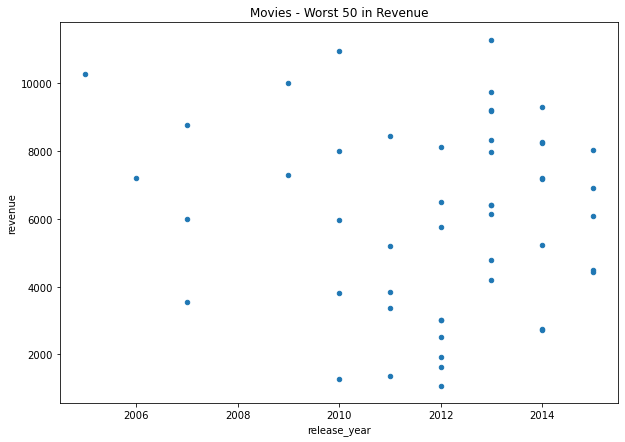

In [98]:
show_scatter(low, 'release_year', 'revenue') #calling the show_scatter function we created
plt.title('Movies - Worst 50 in Revenue'); #using matplotlib to assign a title

Now, we will again use the matplotlib package to create a histogram.

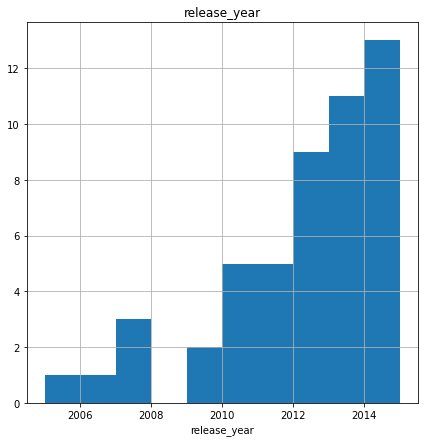

In [99]:
show_hist(low,'release_year') #calling the show_hist function we created

We will now provide a bar graph visual using .plot() again on the .value_counts() to show the number of titles per year in the worst 50.

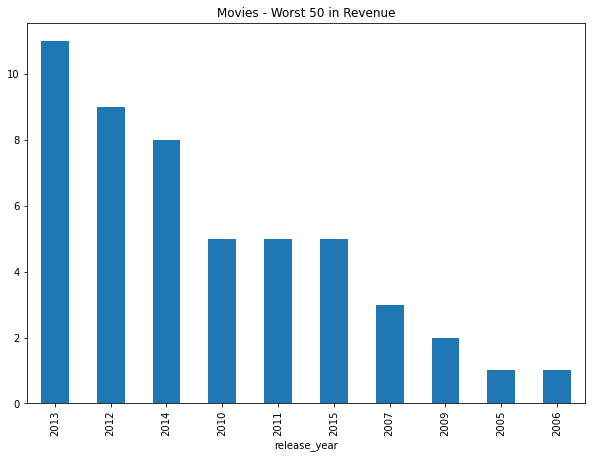

In [100]:
show_bar(low, 'release_year')
plt.title('Movies - Worst 50 in Revenue'); #using matplotlib to assign a title

Here is the same data from the above bar graph set in a pie chart using .plot() again on the .value_counts().

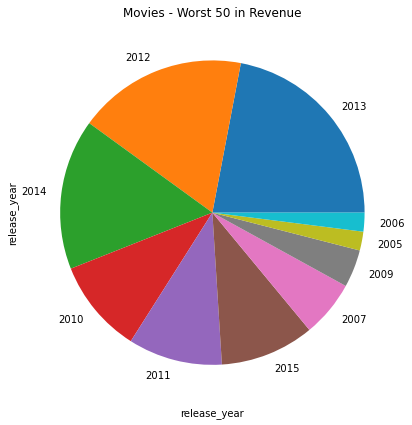

In [101]:
show_pie(low, 'release_year')
plt.title('Movies - Worst 50 in Revenue'); #using matplotlib to assign a title

That answers our question on the worst 50 performing movies from a revenue standpoint.

Let's move on to our next question:

##### 3) Which years had the highest total overall revenue?

For this question, we will go back to using the 'movies' dataframe as we are finished with 'top' and 'low' dataframes. 

First, we want to get a sum of the revenue values by year. We can do this by using the pandas' group by function and we will also store this into a new dataframe as well. We will then use .sort_values() to show in descending order to show the highest revenue year.

In [116]:
movie1 = movies.groupby('release_year').sum() #grouping by release year, summing the revenue values, and storing into 'movie1'
movie1.sort_values(['revenue'], ascending=False).head(10) #calling movie1 and using sort_values() to order by descending

,revenue
release_year,
2015,26762450518
2012,24668427565
2014,24331150183
2011,23691794416
2013,23327871955
2009,22136851996
2010,21957562975
2007,19083900031
2008,19070423058


As you can see, 2015 shows to be the year with the highest total revenue. This would correlate with our top 50 dataset showing that 2015 had the highest single year total of movies in the top 50 revenue.

Now, let's look at the lowest overall. We can use the same 'movie1' dataframe and just sort it now in ascending order.
##### 4) Which years had the lowest total overall revenue?

In [117]:
movie1.sort_values(['revenue'], ascending=True).head(10) #sorting in ascending order - lowest to highest

,revenue
release_year,
1960,53005000
1966,84736689
1963,176526882
1968,197942128
1962,215579846
1969,229707076
1961,335720188
1964,340981782
1965,346359944


This shows 1960 to be the lowest overall year for total movie revenue. There are a few factors to consider here with this report as 1960 would have been the first year of collection for this dataset and there may be overall less entries from that time period.

Now, lets take a look at our next question:
##### 5) Movies with a revenue of equal to or greater than 500 million

In [104]:
movies_a = movies[movies['revenue'] >= 500000000] #adding dataframe where movies had a revenue greater then 500 million
#movies_a = movies.query('revenue >= 500000000') #another way to query the dataframe
movies_a.head(10)

,revenue,director,release_date,release_year
original_title,,,,
Jurassic World,1513528810,Colin Trevorrow,6/9/15,2015
Star Wars: The Force Awakens,2068178225,J.J. Abrams,12/15/15,2015
Furious 7,1506249360,James Wan,4/1/15,2015
The Revenant,532950503,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,12/25/15,2015
The Martian,595380321,Ridley Scott,9/30/15,2015
Minions,1156730962,Kyle Balda|Pierre Coffin,6/17/15,2015
Inside Out,853708609,Pete Docter,6/9/15,2015
Spectre,880674609,Sam Mendes,10/26/15,2015
Avengers: Age of Ultron,1405035767,Joss Whedon,4/22/15,2015


We have 142 total movies that had a revenue of equal to or greater than 500 million. 

Now let's see how that breaks down by year.

In [105]:
movies_a['release_year'].value_counts() #breakdown of number of movie titles by year with a revenue of 500 million or more

2015    14
2014    14
2012    13
2013    10
2011    10
2010     9
2008     9
2009     8
2007     8
2004     7
2005     6
2006     5
2002     4
2003     4
2001     3
1999     2
1997     2
1994     2
1980     1
2000     1
1998     1
1996     1
1995     1
1993     1
1992     1
1991     1
1990     1
1983     1
1982     1
1977     1
Name: release_year, dtype: int64

The years 2015 and 2014 are tied for 14 movies a piece with a revenue of 500 million or more. Again 2015 is at the top of the list which further confirms it being one of the best years revenue wise.

Now, we can plot some visuals of this data.

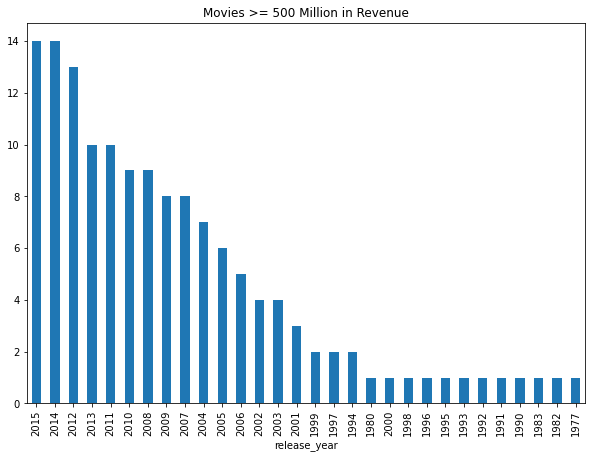

In [106]:
show_bar(movies_a, 'release_year')
plt.title('Movies >= 500 Million in Revenue'); #using matplotlib to assign a title

Here is the same data from the above bar graph set in a pie chart using .plot() again on the .value_counts().

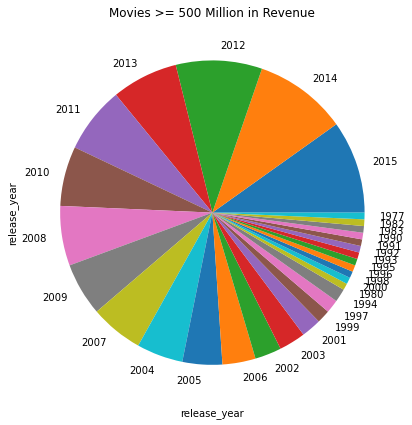

In [107]:
show_pie(movies_a, 'release_year')
plt.title('Movies >= 500 Million in Revenue'); #using matplotlib to assign a title

Now, we will again use the matplotlib package to create a histogram.

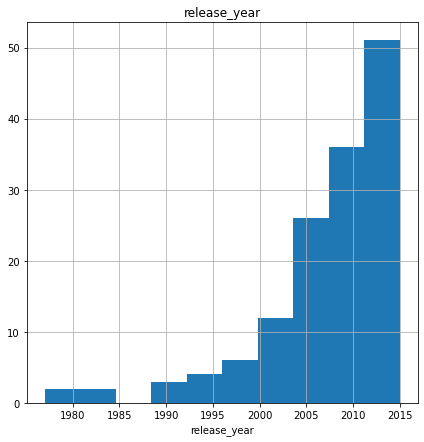

In [108]:
show_hist(movies_a, 'release_year')

Now, let's see if we have any movies that top the 1 billion mark!

##### 6) Movies with a revenue of equal to or greater than 1 billion

In [109]:
movies_b = movies[movies['revenue'] >= 1000000000] #over 1 billion
#movies_b = movies.query('revenue >= 500000000') #another way to query the dataframe
movies_b.head(10)

,revenue,director,release_date,release_year
original_title,,,,
Jurassic World,1513528810,Colin Trevorrow,6/9/15,2015
Star Wars: The Force Awakens,2068178225,J.J. Abrams,12/15/15,2015
Furious 7,1506249360,James Wan,4/1/15,2015
Minions,1156730962,Kyle Balda|Pierre Coffin,6/17/15,2015
Avengers: Age of Ultron,1405035767,Joss Whedon,4/22/15,2015
Avatar,2781505847,James Cameron,12/10/09,2009
Alice in Wonderland,1025467110,Tim Burton,3/3/10,2010
Toy Story 3,1063171911,Lee Unkrich,6/16/10,2010
The Dark Knight,1001921825,Christopher Nolan,7/16/08,2008


Let's see how that breaks down by year.

In [110]:
movies_b['release_year'].value_counts()

2015    5
2012    4
2011    3
2010    2
1995    1
1997    1
2003    1
2006    1
2008    1
2009    1
2013    1
Name: release_year, dtype: int64

In [111]:
movies_b.value_counts().sum()

21

There are 21 movies that had a revenue equal to or greater than 1 billion!

2015 leads the way again with a total of 5 movies in that year alone to top 1 billion in revenue.

Now, let's plot a few visuals for this data.

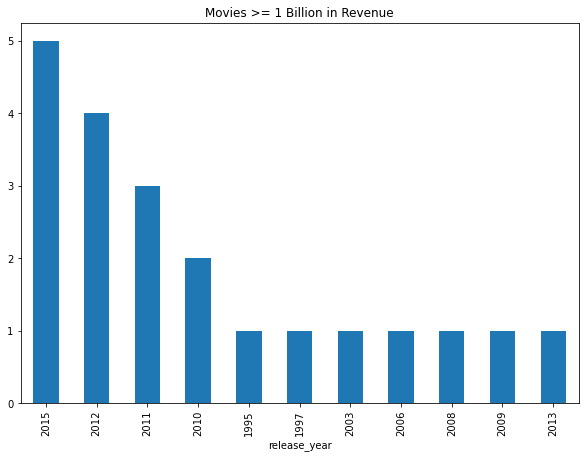

In [112]:
show_bar(movies_b, 'release_year')
plt.title('Movies >= 1 Billion in Revenue'); #using matplotlib to assign a title

Here is the same data from the above bar graph set in a pie chart using .plot() again on the .value_counts().

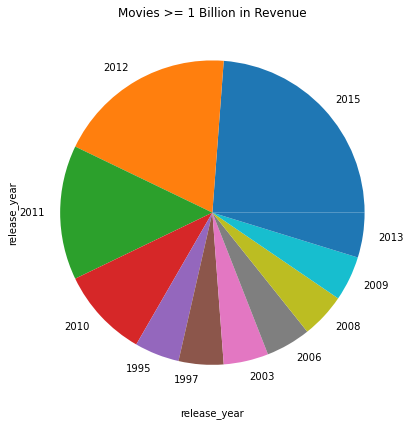

In [113]:
show_pie(movies_b, 'release_year')
plt.title('Movies >= 1 Billion in Revenue'); #using matplotlib to assign a title

This wraps up our analysis of the TMDb dataset!

<a id='conclusions'></a>
## Conclusions

To sum it up, 2015 was a very good year for movies in terms of revenue.</li>
    <ul><li>It had the most amount of movies in the top 50 of revenue</li>
    <li>It was tied for the most amount of movies with a revenue over 500 million with a total of 14</li>
    <li>It has the most movies with a revenue over 1 billion with a total of 5</li></ul>

By analyzing the TMDb dataset, we have been able to identify the top 50 movies in terms of revenue and also some of the worst movies in terms of revenue. We were also able to look at which years contained the highest and worst revenues. While the TMDb dataset offers some valuable information in regards to the movie industry and it was a fun dataset to investigate, I do feel there are some limitations of the dataset. For starters, the collection of data only began in 1960, and we know movies existed prior to that time. We also noticed that movies that were released closer to the beginning of the collection of this dataset are either missing data or have inaccurate data in some of the fields. While I do feel we were able to get a good idea of the top 50 movies overall along with the best years in terms of revenue, the same cannot be said for the worst 50. I feel that with a more expansive and complete dataset on movie revenue, we may be able to better analyze which years were indeed the worst overall in terms of revenue.


Provided below is a list of Web sites, books, forums, blog posts, github repositories, etc. that were referred to or used in creating this submission:

Udacity - https://learn.udacity.com/

Pandas - https://pandas.pydata.org/

Matplotlib - https://matplotlib.org/

w3schools matplotlib - https://www.w3schools.com/python/matplotlib_pyplot.asp

w3schools pandas - https://www.w3schools.com/python/pandas/default.asp

